In [ ]:
!nvidia-smi

Sun Sep 13 13:14:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5913, done.
remote: Total 5913 (delta 0), reused 0 (delta 0), pack-reused 5913
Receiving objects: 100% (5913/5913), 6.34 MiB | 29.23 MiB/s, done.
Resolving deltas: 100% (3921/3921), done.


In [ ]:
import os
os.chdir("/content/darknet/")
!ls

cfg	 examples  LICENSE.fuck  LICENSE.meta  Makefile   scripts
darknet  include   LICENSE.gen	 LICENSE.mit   python	  src
data	 LICENSE   LICENSE.gpl	 LICENSE.v1    README.md


In [ ]:
!sed -i 's/GPU=0/GPU=1/g' Makefile

In [ ]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/utils.c -o obj/utils.o


In [9]:
!wget http://pjreddie.com/media/files/yolov1/yolov1.weights

URL transformed to HTTPS due to an HSTS policy
--2020-09-13 13:53:11--  https://pjreddie.com/media/files/yolov1/yolov1.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789312988 (753M) [application/octet-stream]
Saving to: ‘yolov1.weights.2’

yolov1.weights.2    100%[===================>] 752.75M  1.38MB/s    in 19m 56s 

2020-09-13 14:13:08 (644 KB/s) - ‘yolov1.weights.2’ saved [789312988/789312988]



In [8]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/yolov1.weights /content/darknet/data/dog.jpg

/bin/bash: ./darknet: No such file or directory


In [7]:
!pip install opencv-python

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = '/content/darknet/predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [ ]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/yolov1.weights /content/darknet/data/kite.jpg

layer     filters    size              input                output
    0 conv     64  7 x 7 / 2   448 x 448 x   3   ->   224 x 224 x  64  0.944 BFLOPs
    1 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    2 conv    192  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 192  2.775 BFLOPs
    3 max          2 x 2 / 2   112 x 112 x 192   ->    56 x  56 x 192
    4 conv    128  1 x 1 / 1    56 x  56 x 192   ->    56 x  56 x 128  0.154 BFLOPs
    5 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    6 conv    256  1 x 1 / 1    56 x  56 x 256   ->    56 x  56 x 256  0.411 BFLOPs
    7 conv    512  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 512  7.399 BFLOPs
    8 max          2 x 2 / 2    56 x  56 x 512   ->    28 x  28 x 512
    9 conv    256  1 x 1 / 1    28 x  28 x 512   ->    28 x  28 x 256  0.206 BFLOPs
   10 conv    512  3 x 3 / 1    28 x  28 x 256   ->    28 x  28 x 512  1.850 BFLOPs
   11 conv    256  1 x 1 / 1    28 x  28 x 512   ->

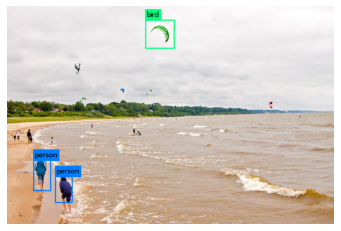

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = '/content/darknet/predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [4]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/yolov1.weights /content/darknet/data/person.jpg

/bin/bash: ./darknet: No such file or directory


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = '/content/darknet/predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [10]:
!wget http://pjreddie.com/media/files/yolov1/tiny-yolov1.weights

URL transformed to HTTPS due to an HSTS policy
--2020-09-13 14:13:10--  https://pjreddie.com/media/files/yolov1/tiny-yolov1.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108399816 (103M) [application/octet-stream]
Saving to: ‘tiny-yolov1.weights’

tiny-yolov1.weights 100%[===================>] 103.38M  5.11MB/s    in 50s     

2020-09-13 14:14:00 (2.07 MB/s) - ‘tiny-yolov1.weights’ saved [108399816/108399816]



In [11]:
!./darknet yolo test /content/darknet/cfg/yolov1-tiny.cfg /content/darknet/tiny-yolov1.weights /content/darknet/data/person.jpg

/bin/bash: ./darknet: No such file or directory


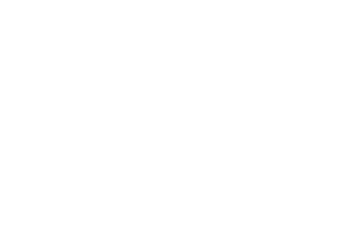

In [12]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = '/content/darknet/predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [ ]:
os.chdir("/content")
from google.colab import files

uploaded = files.upload()

In [ ]:
os.chdir("/content/darknet/")
!./darknet yolo test /content/darknet/cfg/yolov1-tiny.cfg /content/darknet/tiny-yolov1.weights /content/selfie.jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   448 x 448 x   3   ->   448 x 448 x  16  0.173 BFLOPs
    1 max          2 x 2 / 2   448 x 448 x  16   ->   224 x 224 x  16
    2 conv     32  3 x 3 / 1   224 x 224 x  16   ->   224 x 224 x  32  0.462 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  32   ->   112 x 112 x  32
    4 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64  0.462 BFLOPs
    5 max          2 x 2 / 2   112 x 112 x  64   ->    56 x  56 x  64
    6 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128  0.462 BFLOPs
    7 max          2 x 2 / 2    56 x  56 x 128   ->    28 x  28 x 128
    8 conv    256  3 x 3 / 1    28 x  28 x 128   ->    28 x  28 x 256  0.462 BFLOPs
    9 max          2 x 2 / 2    28 x  28 x 256   ->    14 x  14 x 256
   10 conv    512  3 x 3 / 1    14 x  14 x 256   ->    14 x  14 x 512  0.462 BFLOPs
   11 max          2 x 2 / 2    14 x  14 x 512   ->     7 x   7 x 512
   12 con

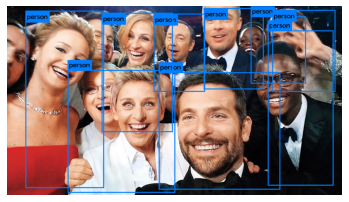

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = '/content/darknet/predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)